<a href="https://colab.research.google.com/github/sailkargutkar/Python-Projects/blob/HELBNTODR100384/HELBNTODR100384.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Importing all necessary libraries**

In [24]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional,Dense,Conv1D,Flatten,LSTM,GlobalMaxPooling1D,Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score
from sklearn.model_selection import GridSearchCV
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

**Downloading necessary nltk libraries**

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
embed_num_dims = 100
max_seq_len = 1000

**Read dataframe using pandas library**

In [6]:
data = pd.read_csv('/content/agr_en_train.csv', names=['id','comment_text','identity_hate'], sep=',')

In [7]:
data.head()

,id,comment_text,identity_hate
0,facebook_corpus_msr_1723796,Well said sonu..you have courage to stand agai...,OAG
1,facebook_corpus_msr_466073,"Most of Private Banks ATM's Like HDFC, ICICI e...",NAG
2,facebook_corpus_msr_1493901,"Now question is, Pakistan will adhere to this?",OAG
3,facebook_corpus_msr_405512,Pakistan is comprised of fake muslims who does...,OAG
4,facebook_corpus_msr_1521685,"??we r against cow slaughter,so of course it w...",NAG


In [8]:
sentences = data['comment_text']
labels = data['identity_hate']

In [9]:
sentences[0]

'Well said sonu..you have courage to stand against dadagiri of Muslims'

In [10]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(sentences)
sequence = tokenizer.texts_to_sequences(sentences)

In [11]:
Y = pd.get_dummies(labels).values

In [12]:
index_of_words = tokenizer.word_index
print(len(index_of_words))

23370


In [13]:
padded_seq = pad_sequences(sequence , maxlen = max_seq_len )

In [14]:
padded_seq

array([[   0,    0,    0, ...,   93,    4,  116],
       [   0,    0,    0, ...,  467, 1622,  223],
       [   0,    0,    0, ...,   18,    2,   12],
       ...,
       [   0,    0,    0, ...,    0,    0,  102],
       [   0,    0,    0, ...,   10,  487,  778],
       [   0,    0,    0, ...,   35,   36,  824]], dtype=int32)

In [15]:
from keras.utils import to_categorical

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(padded_seq,Y ,test_size = 0.10, random_state = 42)

In [17]:
X_train.shape

(10799, 1000)

In [18]:
Y_train.shape

(10799, 3)

In [21]:
import urllib.request as urllib
testfile = urllib.URLopener()
testfile.retrieve("https://resources.oreilly.com/conferences/natural-language-processing-with-deep-learning/raw/master/data/glove.6B.100d.txt", "glove.6B.100d.txt")

f = open('/content/glove.6B.100d.txt')
embedd_index = {}
for line in f:
    val = line.split()
    word = val[0]
    coff = np.asarray(val[1:],dtype = 'float')
    embedd_index[word] = coff

f.close()
print('Found %s word vectors.' % len(embedd_index))

Found 400000 word vectors.


In [22]:
embedd_index['good']

array([-0.030769 ,  0.11993  ,  0.53909  , -0.43696  , -0.73937  ,
       -0.15345  ,  0.081126 , -0.38559  , -0.68797  , -0.41632  ,
       -0.13183  , -0.24922  ,  0.441    ,  0.085919 ,  0.20871  ,
       -0.063582 ,  0.062228 , -0.051234 , -0.13398  ,  1.1418   ,
        0.036526 ,  0.49029  , -0.24567  , -0.412    ,  0.12349  ,
        0.41336  , -0.48397  , -0.54243  , -0.27787  , -0.26015  ,
       -0.38485  ,  0.78656  ,  0.1023   , -0.20712  ,  0.40751  ,
        0.32026  , -0.51052  ,  0.48362  , -0.0099498, -0.38685  ,
        0.034975 , -0.167    ,  0.4237   , -0.54164  , -0.30323  ,
       -0.36983  ,  0.082836 , -0.52538  , -0.064531 , -1.398    ,
       -0.14873  , -0.35327  , -0.1118   ,  1.0912   ,  0.095864 ,
       -2.8129   ,  0.45238  ,  0.46213  ,  1.6012   , -0.20837  ,
       -0.27377  ,  0.71197  , -1.0754   , -0.046974 ,  0.67479  ,
       -0.065839 ,  0.75824  ,  0.39405  ,  0.15507  , -0.64719  ,
        0.32796  , -0.031748 ,  0.52899  , -0.43886  ,  0.6740

**Here our hyperparameter tuning process**

In [ ]:
classifierD = DecisionTreeClassifier()
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }
grid = GridSearchCV(classifierD, parameters)
grid = grid.fit(X_train, Y_train)
classifierD = grid.best_estimator_
classifierD.fit(X_train, Y_train)

**convolutional neural network (CNN) embedd with GLOVe module**

In [ ]:
embedding_matrix = np.zeros((400000, 100))
for word, index in tokenizer.word_index.items():
    if index > 400000 - 1:
        break
    else:
        embedding_vector = embedd_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
cnn = Sequential()
cnn.add(Embedding(400000, 100, input_length=1000, weights=[embedding_matrix], trainable=False))
cnn.add(Dropout(0.2))
cnn.add(Conv1D(64, 5, activation='relu'))
cnn.add(MaxPooling1D(pool_size=4))
cnn.add(LSTM(100))
cnn.add(Dense(3, activation='sigmoid'))

**Compile module data**

In [ ]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit module data**

In [ ]:
modCnn = cnn.fit(X_train, Y_train, validation_split=0.4, epochs = 3)

Train on 6479 samples, validate on 4320 samples
Epoch 1/3
6479/6479 [==============================] - 85s 13ms/step - loss: 1.0263 - accuracy: 0.4530 - val_loss: 0.9679 - val_accuracy: 0.5100
Epoch 2/3
6479/6479 [==============================] - 85s 13ms/step - loss: 0.9576 - accuracy: 0.5081 - val_loss: 0.9496 - val_accuracy: 0.5208
Epoch 3/3
6479/6479 [==============================] - 85s 13ms/step - loss: 0.9211 - accuracy: 0.5333 - val_loss: 0.9233 - val_accuracy: 0.5428


**Evaluate module data**

In [ ]:
accr = cnn.evaluate(X_test,Y_test)

1200/1200 [==============================] - 3s 3ms/step


**Prints testing data loss and accuracy**

In [ ]:
print('Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Loss: 0.916
  Accuracy: 0.568


**Predict module data on test data set**

In [ ]:
prdVal = cnn.predict(X_test)

**Prints F1 score and confusion matrix**

In [ ]:
prdVal = np.argmax(prdVal, axis=1)
prdVal_x = np.argmax(Y_test, axis=1)

In [ ]:
print(confusion_matrix(prdVal_x,prdVal))
f1_score(prdVal_x,prdVal,average="micro")

[[213 153  78]
 [106 368  39]
 [ 98  44 101]]


0.5683333333333334

**Visualize model accuracy and loss in graphical format**

Accuracy graph visualization

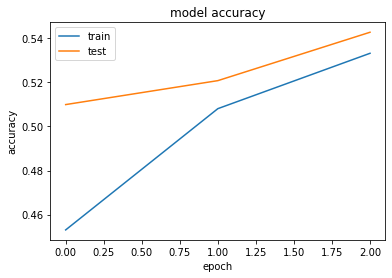

In [ ]:
plt.plot(modCnn.history['accuracy'])
plt.plot(modCnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Loss graph visualization

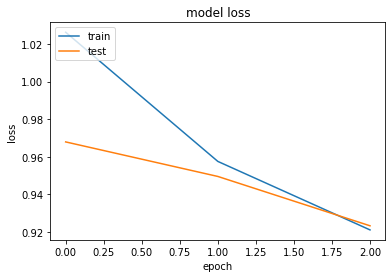

In [ ]:

plt.plot(modCnn.history['loss'])
plt.plot(modCnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()